# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Range
x = 1500
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=x)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=x)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


In [9]:
###################################################
################Troubleshooting####################
###################################################
#Printing list of cities
cities_troubleshooting = ['Tokyo', 'Los Angeles', 'London']
print(weather_api_key)
print(cities_troubleshooting)

bcbeeeca0b8168b67a3e827f8b9d559e
['Tokyo', 'Los Angeles', 'London']


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
#############################################################
#####################Troubleshooting#########################
#############################################################
#JSON links to cities are currenly working
Tokyo_json = 'https://api.openweathermap.org/data/2.5/weather?q=tokyo&appid=bcbeeeca0b8168b67a3e827f8b9d559e'
LA_json = 'https://api.openweathermap.org/data/2.5/weather?q=losangeles&appid=bcbeeeca0b8168b67a3e827f8b9d559e'
London_json = 'https://api.openweathermap.org/data/2.5/weather?q=london&appid=bcbeeeca0b8168b67a3e827f8b9d559e'
    
#Creating list of cities with workinf urls
working_jsons = [Tokyo_json, LA_json, London_json]

#Check to see if the json is captured in the list
#city_weather_0 = requests.get(working_jsons[0]).json()
#print(city_weather_0)

#Create empty list to store data
city_data_troubleshooting = []

#Loop through all the cities in our list to fetch weather data
#for i in enumerate(working_jsons):
for i in working_jsons:
     # Run an API request for each of the cities
    try:
        #city_weather = requests.get(city_url).json()
        city_weather_ts = requests.get(i).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date        
        # Append the City information into city_data list
        ######Obtain infromation from nested dictionary of jsons#########################
        city_data_troubleshooting.append({"City": city_weather_ts.get('name'), 
                          "Lat": city_weather_ts.get('coord',{}).get('lat'), 
                          "Lng": city_weather_ts.get('coord',{}).get('lon'), 
                          "Max Temp": city_weather_ts.get('main',{}).get('temp_max'),
                          "Humidity": city_weather_ts.get('main',{}).get('humidity'),
                          "Cloudiness": city_weather_ts.get('clouds',{}).get('all'),
                          "Wind Speed": city_weather_ts.get('wind',{}).get('speed'),
                          "Country": city_weather_ts.get('sys',{}).get('country'),
                          "Date": city_weather_ts.get('dt')})
       
        
    # If an error is experienced, skip the city
    except:
        print("JSON not found. Skipping...")
        pass

# Convert the cities weather data into a Pandas DataFrame
city_data_ts_df = pd.DataFrame(city_data_troubleshooting)


# Show Record Count
print(city_data_ts_df.count())
city_data_ts_df.head()

#############################################################
##############Troubleshooting Completed######################
#############################################################

City          2
Lat           2
Lng           2
Max Temp      2
Humidity      2
Cloudiness    2
Wind Speed    2
Country       2
Date          2
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tokyo,35.6895,139.6917,279.61,64.0,0.0,0.45,JP,1.703790e+09
1,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,London,51.5085,-0.1257,285.09,86.0,40.0,6.69,GB,1.703789e+09


In [57]:
# Set the API base URL obtained from https://openweathermap.org/current
#url = f"https://api.openweathermap.org/data/2.5/weather?q{={city}&appid={weather_api_key}"
#url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid=bcbeeeca0b8168b67a3e827f8b9d559e"
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #query_url = url + "api_keys" + '&units=metrics'
    #city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
    #city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid=bcbeeeca0b8168b67a3e827f8b9d559e" #&units=metrics
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metrics'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #city_weather = requests.get(url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #Check out the API documentation on the website ^^
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | ta`u
Processing Record 3 of Set 1 | sinan
Processing Record 4 of Set 1 | kampong cham
Processing Record 5 of Set 1 | flin flon
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | arawa
Processing Record 8 of Set 1 | athi river
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | zemio
Processing Record 17 of Set 1 | todos santos
Processing Record 18 of Set 1 | rongelap
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | pearsall
Processing 

Processing Record 39 of Set 4 | daru
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | torit
Processing Record 42 of Set 4 | carolina beach
Processing Record 43 of Set 4 | parauapebas
Processing Record 44 of Set 4 | manggar
Processing Record 45 of Set 4 | palmer
Processing Record 46 of Set 4 | kodinsk
Processing Record 47 of Set 4 | uturoa
Processing Record 48 of Set 4 | xinyuan
Processing Record 49 of Set 4 | chertkovo
Processing Record 0 of Set 5 | walvis bay
Processing Record 1 of Set 5 | tralee
Processing Record 2 of Set 5 | saipan
Processing Record 3 of Set 5 | ayr
Processing Record 4 of Set 5 | sint-gillis-waas
Processing Record 5 of Set 5 | bonthe
Processing Record 6 of Set 5 | richfield
Processing Record 7 of Set 5 | ponta pora
Processing Record 8 of Set 5 | tercan
Processing Record 9 of Set 5 | udachny
Processing Record 10 of Set 5 | vorgashor
Processing Record 11 of Set 5 | mejit
Processing Record 12 of Set 5 | yuzhno-kurilsk
Processing Record 13 of Set 5

Processing Record 30 of Set 8 | kamaishi
Processing Record 31 of Set 8 | nar'yan-mar
Processing Record 32 of Set 8 | dalandzadgad
Processing Record 33 of Set 8 | dubbo
Processing Record 34 of Set 8 | ahtari
Processing Record 35 of Set 8 | kiunga
Processing Record 36 of Set 8 | kemin
Processing Record 37 of Set 8 | shantobe
Processing Record 38 of Set 8 | moundsville
Processing Record 39 of Set 8 | fada
Processing Record 40 of Set 8 | guerrero negro
Processing Record 41 of Set 8 | aberdeen
Processing Record 42 of Set 8 | brunswick
Processing Record 43 of Set 8 | demyansk
Processing Record 44 of Set 8 | aleg
Processing Record 45 of Set 8 | amasra
Processing Record 46 of Set 8 | visby
Processing Record 47 of Set 8 | port alfred
Processing Record 48 of Set 8 | tucuma
Processing Record 49 of Set 8 | puerto deseado
Processing Record 0 of Set 9 | howrah
Processing Record 1 of Set 9 | dunedin
Processing Record 2 of Set 9 | novouzensk
Processing Record 3 of Set 9 | susuman
Processing Record 4 o

Processing Record 20 of Set 12 | semporna
Processing Record 21 of Set 12 | evanston
Processing Record 22 of Set 12 | cuito
Processing Record 23 of Set 12 | am djarass
City not found. Skipping...
Processing Record 24 of Set 12 | oban
Processing Record 25 of Set 12 | rasht
Processing Record 26 of Set 12 | valparaiso
Processing Record 27 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 28 of Set 12 | swakopmund
Processing Record 29 of Set 12 | hampton bays
-----------------------------
Data Retrieval Complete      
-----------------------------


In [59]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
print(city_data_df.count())

# Display sample data
city_data_df.head()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,295.90,82,60,8.57,PN,1703807964
1,ta`u,-14.2336,-169.5144,300.98,74,100,1.45,AS,1703807965
2,sinan,34.8262,126.1086,278.84,67,26,3.41,KR,1703807966
3,kampong cham,11.9934,105.4635,296.70,80,7,4.11,KH,1703807967
4,flin flon,54.7682,-101.8650,268.06,80,0,1.03,CA,1703807969


In [63]:
#Convert Max Temperature from Kelvins to Celcius
city_data_df['Max Temp'] = city_data_df['Max Temp'] -273.15

#Show the table with the converted information
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.75,82,60,8.57,PN,1703807964
1,ta`u,-14.2336,-169.5144,27.83,74,100,1.45,AS,1703807965
2,sinan,34.8262,126.1086,5.69,67,26,3.41,KR,1703807966
3,kampong cham,11.9934,105.4635,23.55,80,7,4.11,KH,1703807967
4,flin flon,54.7682,-101.8650,-5.09,80,0,1.03,CA,1703807969
...,...,...,...,...,...,...,...,...,...
548,oban,56.4127,-5.4706,7.97,88,100,8.83,GB,1703808586
549,rasht,37.2808,49.5832,9.09,86,100,2.96,IR,1703808587
550,valparaiso,-33.0393,-71.6273,17.80,77,40,2.57,CL,1703808587


In [64]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.75,82,60,8.57,PN,1703807964
1,ta`u,-14.2336,-169.5144,27.83,74,100,1.45,AS,1703807965
2,sinan,34.8262,126.1086,5.69,67,26,3.41,KR,1703807966
3,kampong cham,11.9934,105.4635,23.55,80,7,4.11,KH,1703807967
4,flin flon,54.7682,-101.8650,-5.09,80,0,1.03,CA,1703807969


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

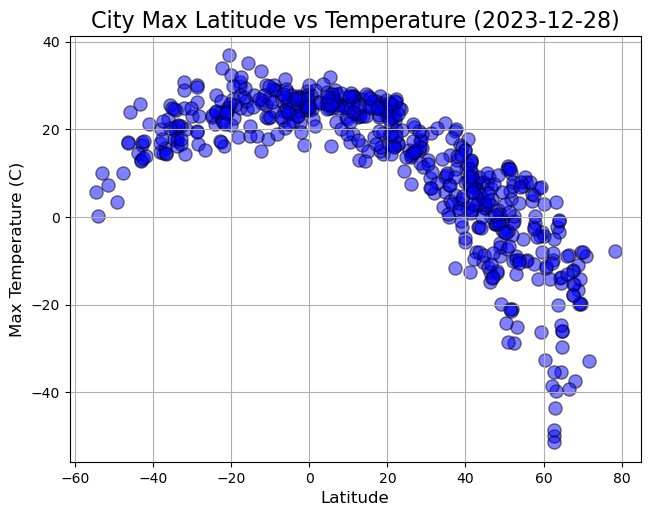

In [66]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            90, 
            marker="o", 
            facecolors="blue", 
            edgecolors='black', 
            alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (C)',fontsize=12)
plt.title('City Max Latitude vs Temperature (2023-12-28)',fontsize=16)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

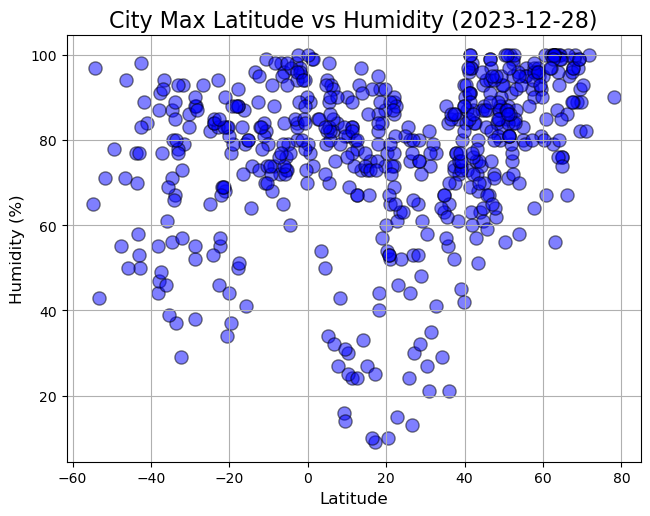

In [67]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
            90, 
            marker="o", 
            facecolors="blue", 
            edgecolors='black', 
            alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)',fontsize=12)
plt.title('City Max Latitude vs Humidity (2023-12-28)',fontsize=16)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

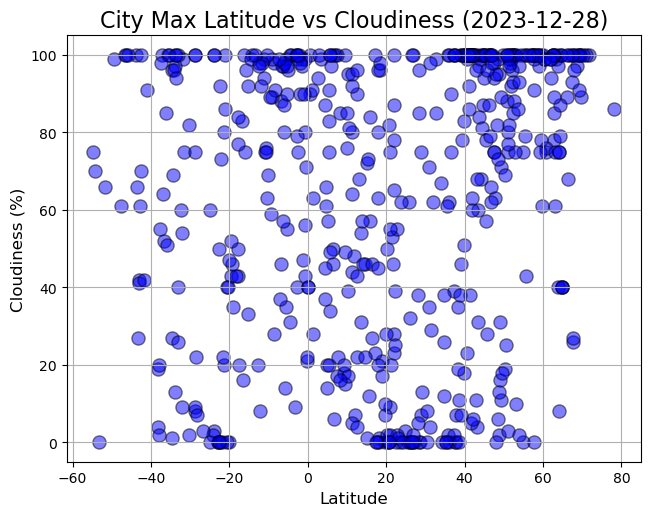

In [68]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            90, 
            marker="o", 
            facecolors="blue", 
            edgecolors='black', 
            alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)',fontsize=12)
plt.title('City Max Latitude vs Cloudiness (2023-12-28)',fontsize=16)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

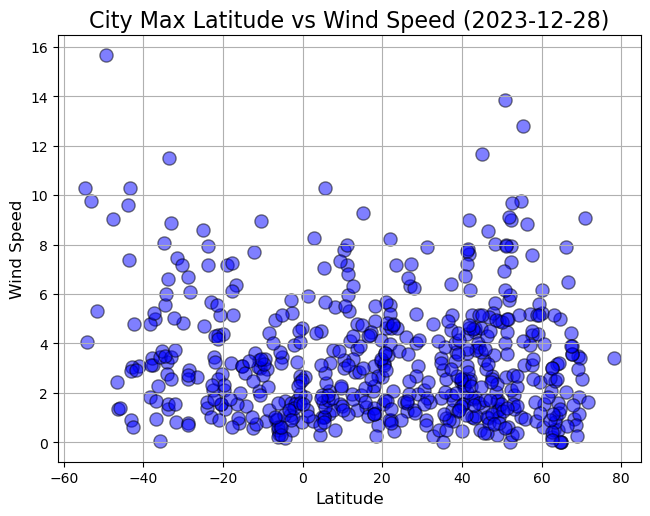

In [69]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            90, 
            marker="o", 
            facecolors="blue", 
            edgecolors='black', 
            alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed',fontsize=12)
plt.title('City Max Latitude vs Wind Speed (2023-12-28)',fontsize=16)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots   
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 90, marker="o", facecolors="blue", alpha=0.5)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=18,color="red")
    plt.xlabel('Latitude', fontsize=16)
    plt.ylabel(f'{ylabel}', fontsize=16)
    plt.grid() 

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sinan,34.8262,126.1086,5.69,67,26,3.41,KR,1703807966
3,kampong cham,11.9934,105.4635,23.55,80,7,4.11,KH,1703807967
4,flin flon,54.7682,-101.8650,-5.09,80,0,1.03,CA,1703807969
8,lihue,21.9789,-159.3672,26.58,86,78,5.56,US,1703807897
9,ribeira grande,38.5167,-28.7000,16.35,72,11,3.67,PT,1703807974


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.75,82,60,8.57,PN,1703807964
1,ta`u,-14.2336,-169.5144,27.83,74,100,1.45,AS,1703807965
5,souillac,-20.5167,57.5167,25.21,83,40,1.54,MU,1703807969
6,arawa,-6.2132,155.5367,31.45,65,97,0.48,PG,1703807971
7,athi river,-1.4507,36.9824,16.36,95,99,1.71,KE,1703807972


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8466460740834105


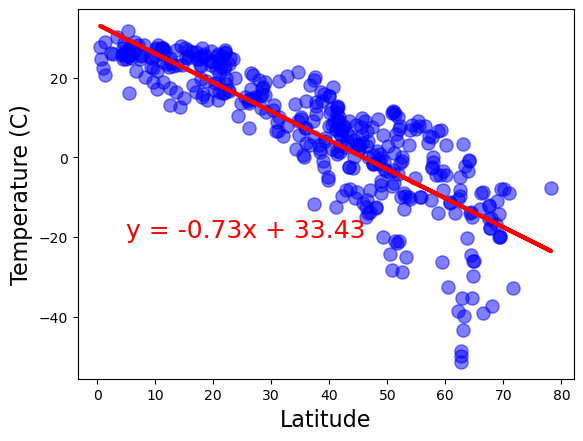

In [73]:
# Linear regression on Northern Hemisphere
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 5, -20, 'Temperature (C)')
plt.savefig("output_data/Fig5.png", bbox_inches = "tight")

The r-value is 0.6078940468738726


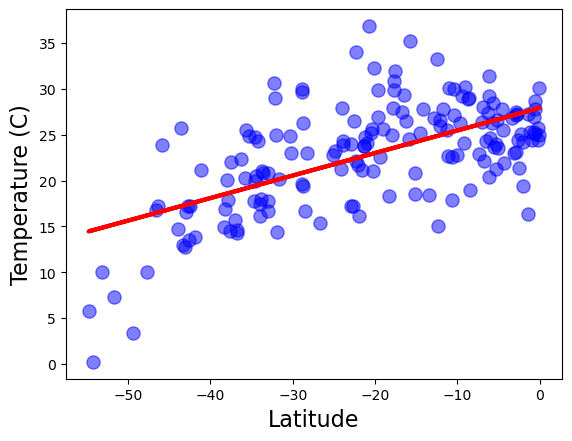

In [74]:
# Linear regression on Southern Hemisphere
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], 5, -20, 'Temperature (C)')
plt.savefig("output_data/Fig6.png", bbox_inches = "tight")

**Discussion about the linear relationship:** 
Northern and Southern Hemisphere respectively have an R value of -0.85 and 0.68. This shows that there is a strong negative association between Latitude and Temperature for the Northern Hemisphere. For the Southern Hemisphere there is a moderate positive association between Latitude and Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.40136147452986876


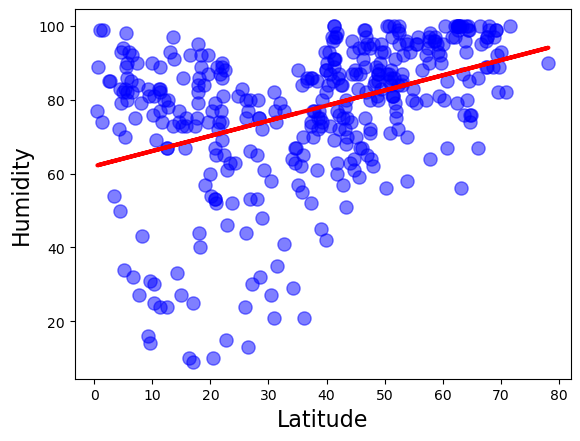

In [75]:
# Northern Hemisphere
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], 5, -20, 'Humidity')
plt.savefig("output_data/Fig7.png", bbox_inches = "tight")

The r-value is 0.3379450190026808


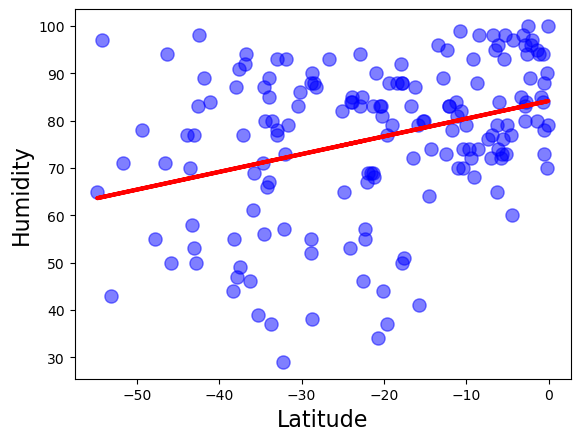

In [76]:
# Southern Hemisphere
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], 5, -20, 'Humidity')
plt.savefig("output_data/Fig8.png", bbox_inches = "tight")

**Discussion about the linear relationship:** Northern and Southern Hemisphere respectively have an R value of 0.40 and 0.34. This shows that there is a moderately weak positive correlation between Latitude and Humidity for both the Northern and Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.35283975111909466


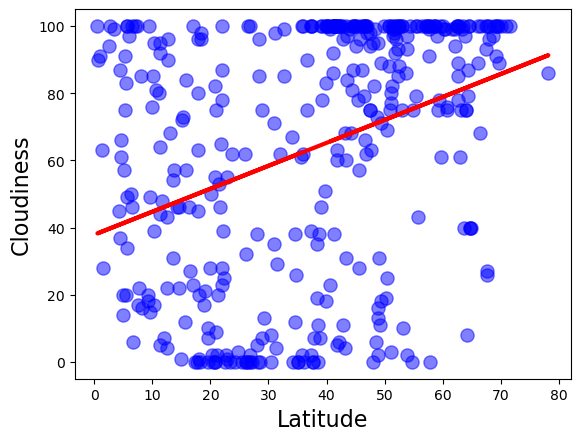

In [77]:
# Northern Hemisphere
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], 5, -20, 'Cloudiness')
plt.savefig("output_data/Fig9.png", bbox_inches = "tight")

The r-value is 0.13840796995914834


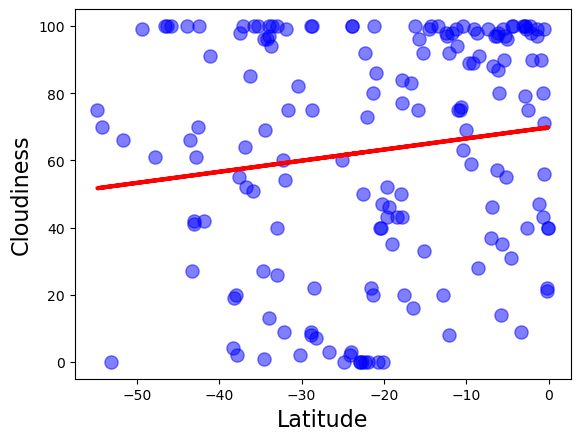

In [78]:
# Southern Hemisphere
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], 5, -20, 'Cloudiness')
plt.savefig("output_data/Fig10.png", bbox_inches = "tight")

**Discussion about the linear relationship:** Northern and Southern Hemisphere respectively have an R value of 0.35 and 0.13. This shows that there is a weak positive correlation between Latitude and Cloudiness for both the Northern and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0003886514751823665


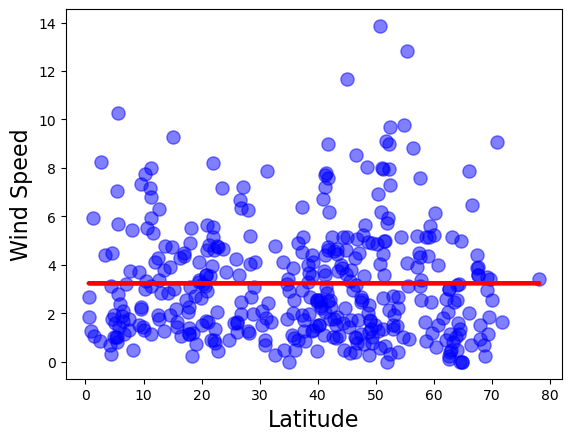

In [79]:
# Northern Hemisphere
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], 5, -20, 'Wind Speed')
plt.savefig("output_data/Fig11.png", bbox_inches = "tight")

The r-value is -0.393169735470224


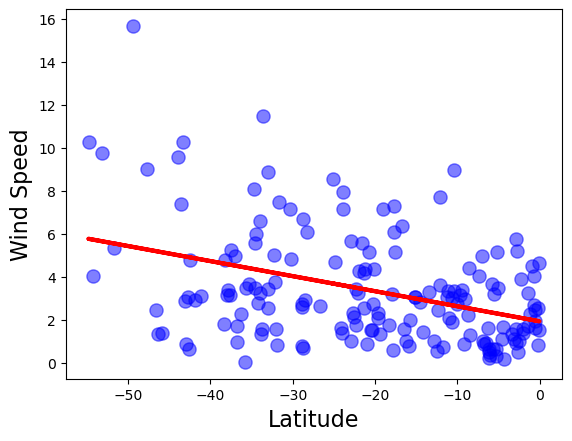

In [80]:
# Southern Hemisphere
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], 5, -20, 'Wind Speed')
plt.savefig("output_data/Fig12.png", bbox_inches = "tight")

**Discussion about the linear relationship:** Northern and Southern Hemisphere respectively have an R value of 0.0003 and -0.39. This shows that there is a extremely weak correlation between Latitude and Windspeed for the Northern Hemisphere. For the Southern Hemisphere there is a weak negative correlation between Latitude and Windspeed.